# PCA Lab

In this lab we will be practicing using PCA to analyze a genomic dataset


## The data

*Arabidopsis thaliana*. This data was downloaded from [The 1001 Genomes Project](https://1001genomes.org/data/GMI-MPI/releases/v3.1) and the file is called `1001genomes_snp-short-indel_only_ACGTN.vcf.gz` and is in the '/mnt/research/PLB812_FS24_S001/12_PCA' folder.

## Running PCA 

We will be using the software Plink to run PCA. Our first step will be loading the Plink module on the hpcc.

`$module purge` <br>
`$module load PLINK/2.00a3.7-gfbf-2023a`

Next, if your data is in a vcf file, you need to convert it to a plink format.  We will also want to filter these files to give us SNPs that are not in linkage disequilibrium with each other, and to remove rare sites or sites with a lot of missing data. You can look up each of the options in the following command to see how they work.

`$plink2 --vcf [file-prefix] --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out [file-prefix].filtered.in`

If you were to do this another time and your data was already in a plink format (file names end with **.bed** and **.bim** and **.fam** and have the same file prefix), you could run the following command:

`$plink2 -bfile [file-prefix] --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out [file-prefix].filtered`

Once you have filtered your plink files of SNPs, it is time to run the PCA analysis!

`$plink2 -bfile [file-prefix] --extract [file-prefix].filtered.in --pca --allow-extra-chr --out [file-prefix]-pca`

Note the `--extract` flag here directs you towards a list of sites that was generated in the previous filtered set. If you were to skip this, plink would try to run the PCA on all the sites, not just the sites that passed the filters. 

You can use **less** to look at the output files from this step, which will be `[file-prefix]-pca.eigenvec` and `[file-prefix]-pca.eigenval`.

`plink2 --vcf 1001genomes_snp-short-indel_only_ACGTN.vcf.gz --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out 1001genomes_snp-short-indel_only_ACGTN.filtered.in`

`plink2 -bfile 1001genomes_snp-short-indel_only_ACGTN.filtered.in --pca --allow-extra-chr --out 1001genomes_snp-short-indel_only_ACGTN-pca`

## Subsampling SNPs

We talked in class about how the number of SNPs is important for making a PCA. In the lab we'll investigate this using the *A. thaliana* data.

We can efficiently subsample a smaller dataset by sampling from the [file-prefix].filtered.in site, and then only using these sites when we run the PCA. To subsample 100 sites, use the following bash command:

`shuf [file-prefix].filtered.in | head -n 100 > [file-prefix].100.in`

Take a second to look at this command and think about what the different parts of it do (or ask a neighbor or Emily!).

Modify the command to take subsamples of 100, 1000, and 10,000 sites.

You can count the number of lines in your `[file-prefix].x.in` files using `wc -l [file]`. Use this to check that your subsampling worked correctly. Then, rerun your PCA on these subsamples.

`shuf arabidopsis.prune.in | head -n 100 > 1001genomes_snp-short-indel_only_ACGTN.100.in`
`shuf arabidopsis.prune.in | head -n 1000 > 1001genomes_snp-short-indel_only_ACGTN.1000.in`
`shuf arabidopsis.prune.in | head -n 10000 > 1001genomes_snp-short-indel_only_ACGTN.10000.in`

`plink2 -bfile arabidopsis --extract 1001genomes_snp-short-indel_only_ACGTN.100.in --pca --allow-extra-chr --out 100-pca`
`plink2 -bfile arabidopsis --extract 1001genomes_snp-short-indel_only_ACGTN.1000.in --pca --allow-extra-chr --out 1000-pca`
`plink2 -bfile arabidopsis --extract 1001genomes_snp-short-indel_only_ACGTN.10000.in --pca --allow-extra-chr --out 10000-pca`

## Making plots

You will need some extra information about the genotypes in your PCA.

This file is called `accessions.csv`.

There is a file called 'pca-plots.Rmd' in the class folder ('/mnt/research/PLB812_FS24_S001/12_PCA') that has code for making PCA plots. Please open it up in Rstudio, edit the paths for your own data, and make PCA plots for all the SNPs and then for PCAs made from each subset.

When you're done, put the PCA plots in this notebook.

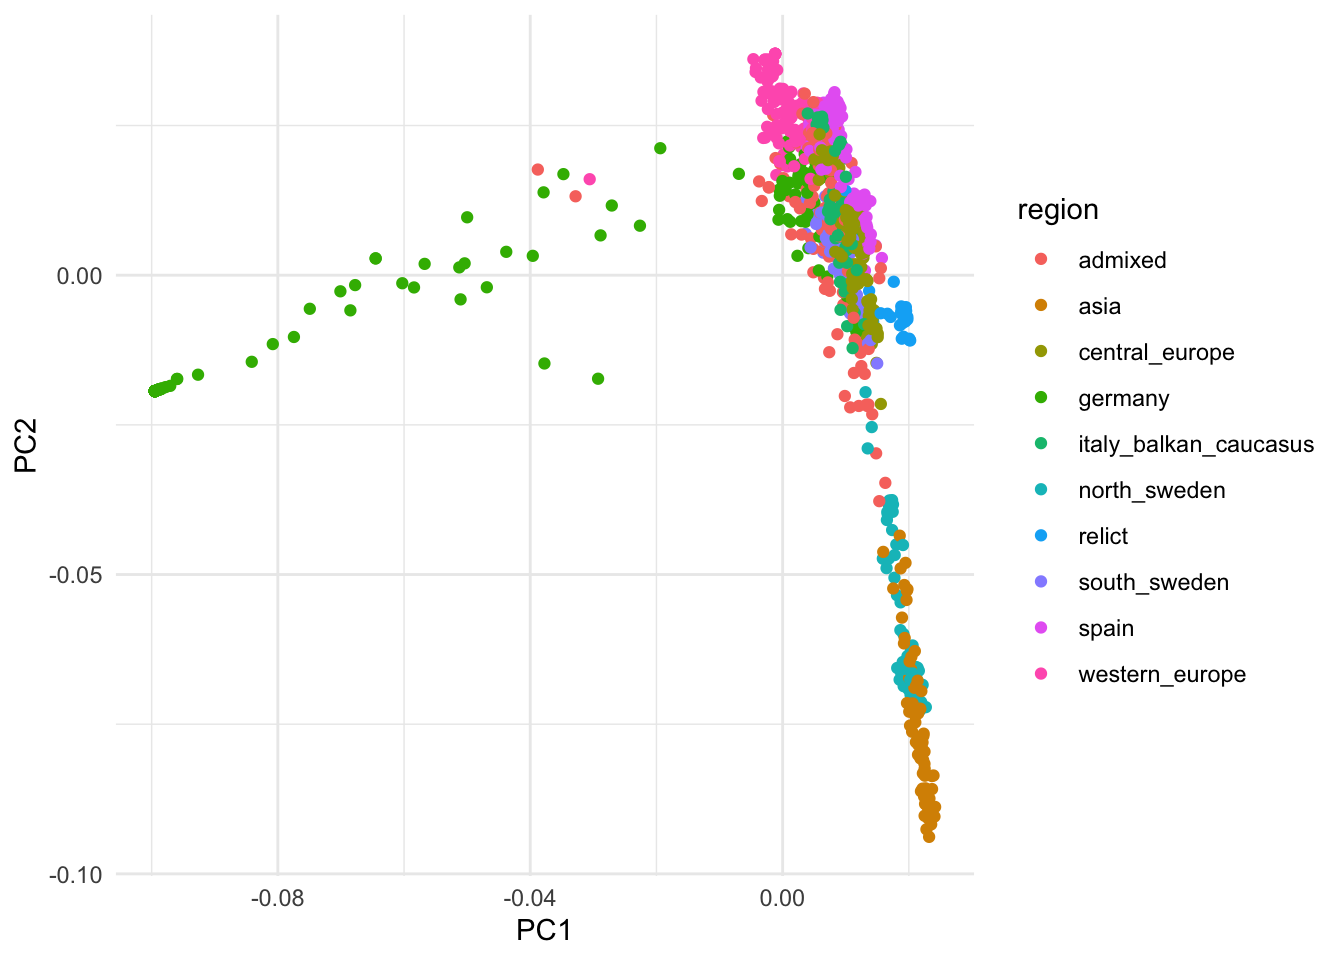  
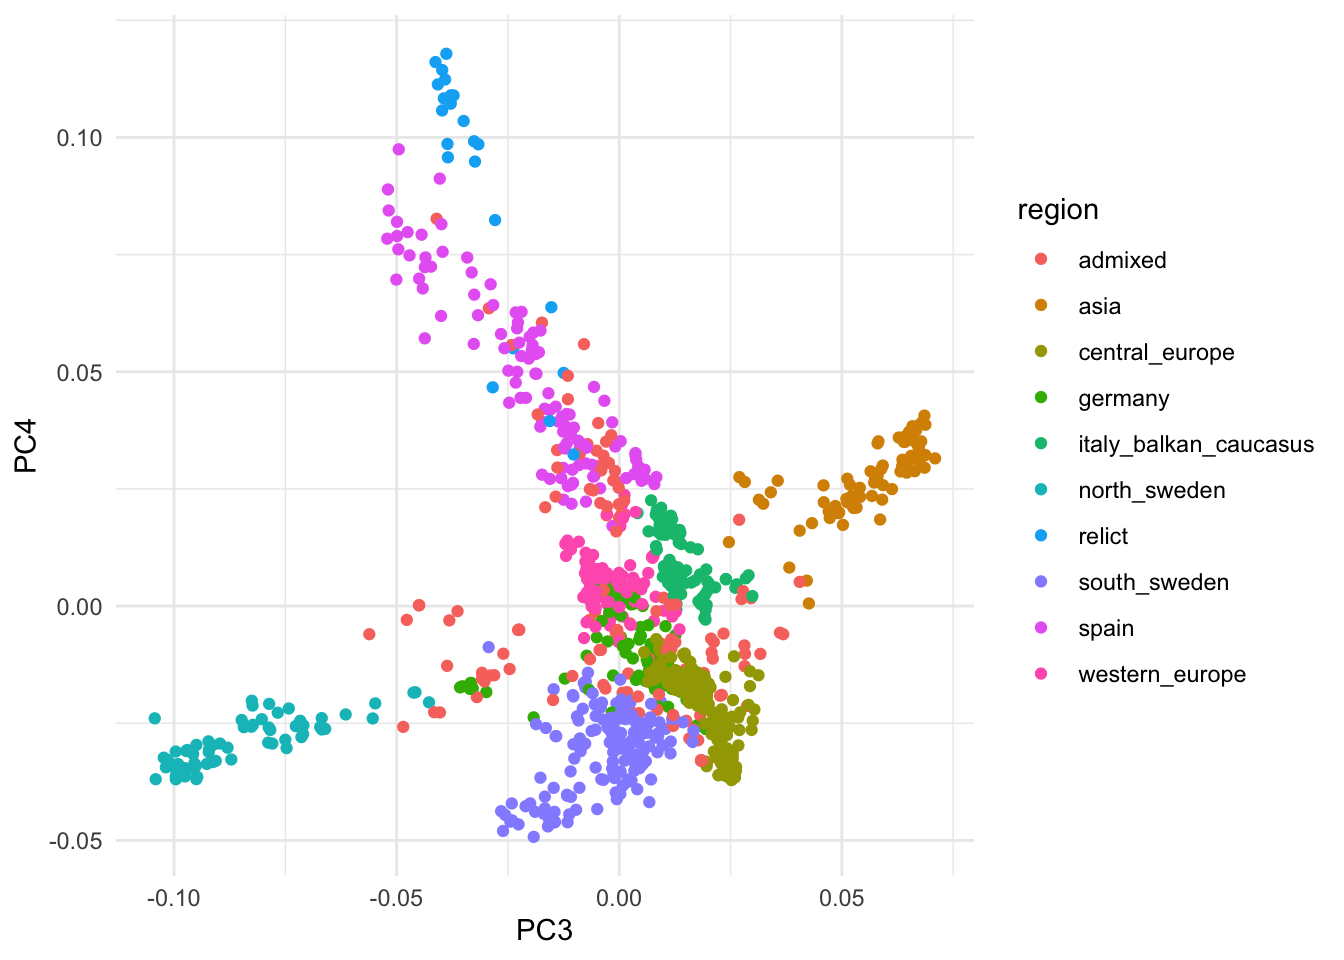

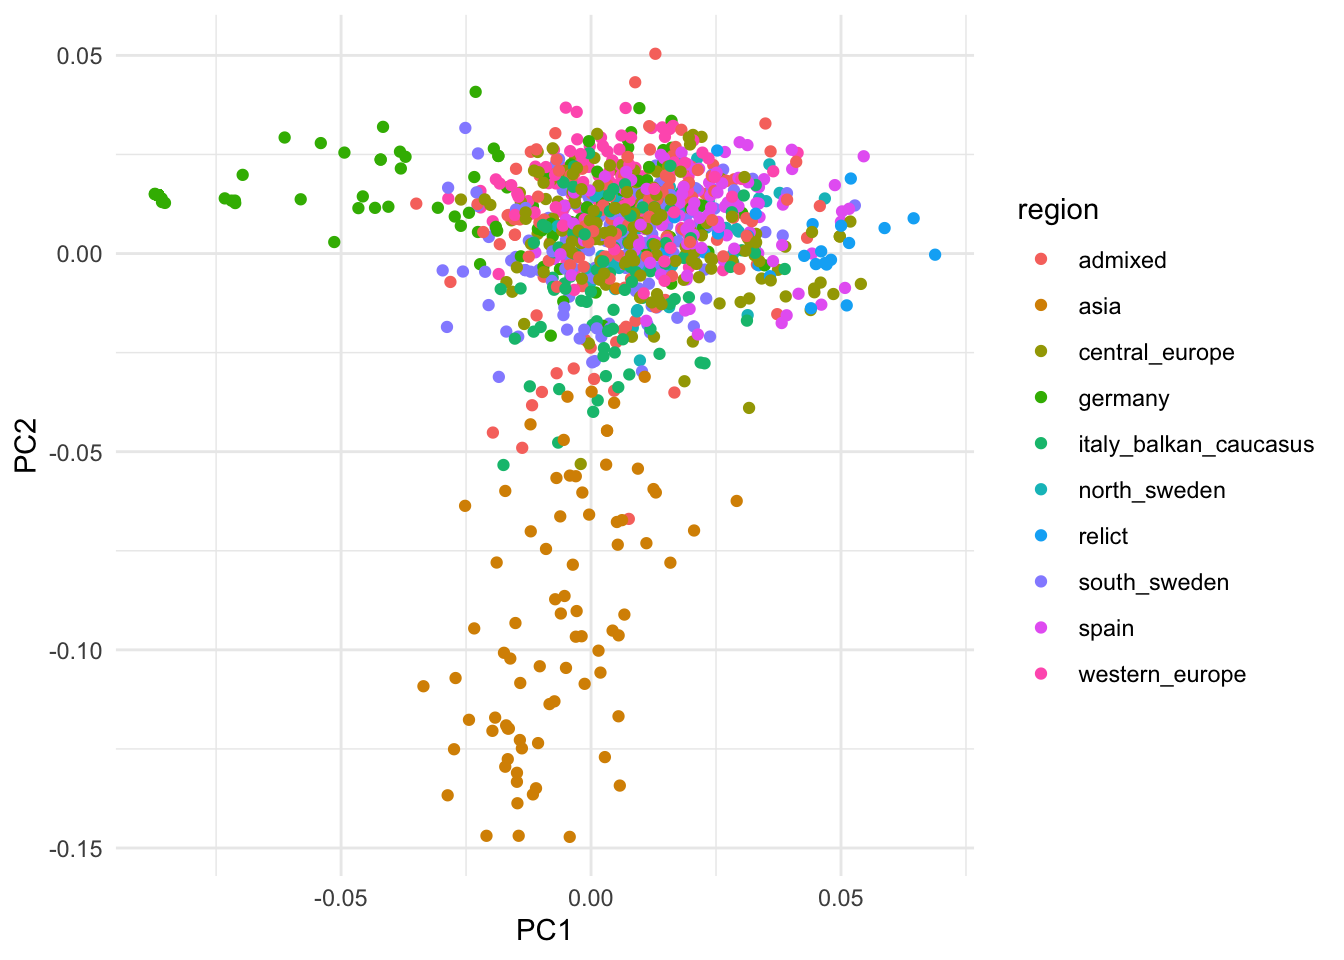
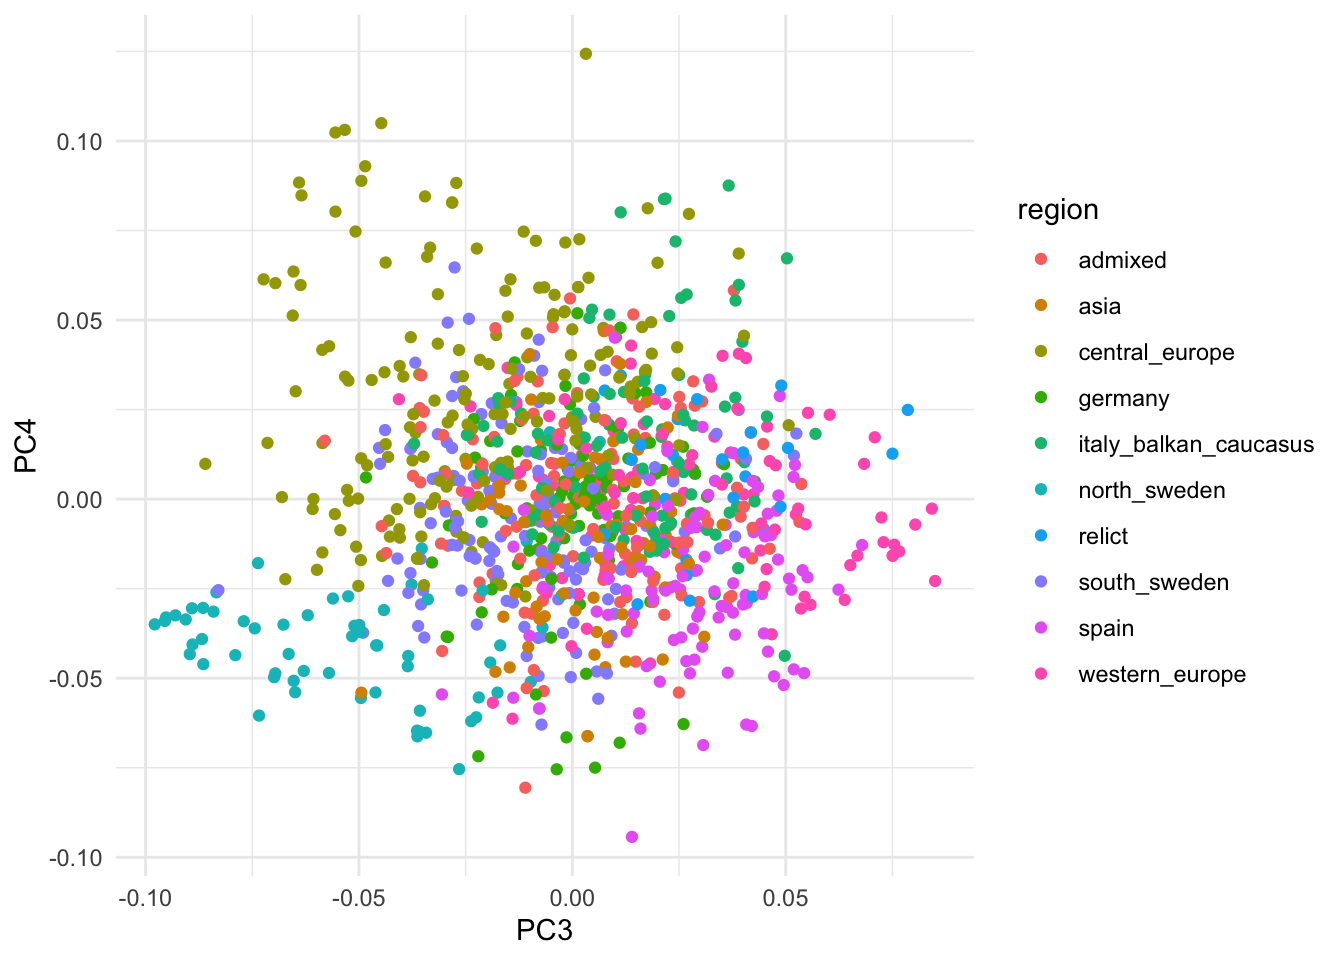

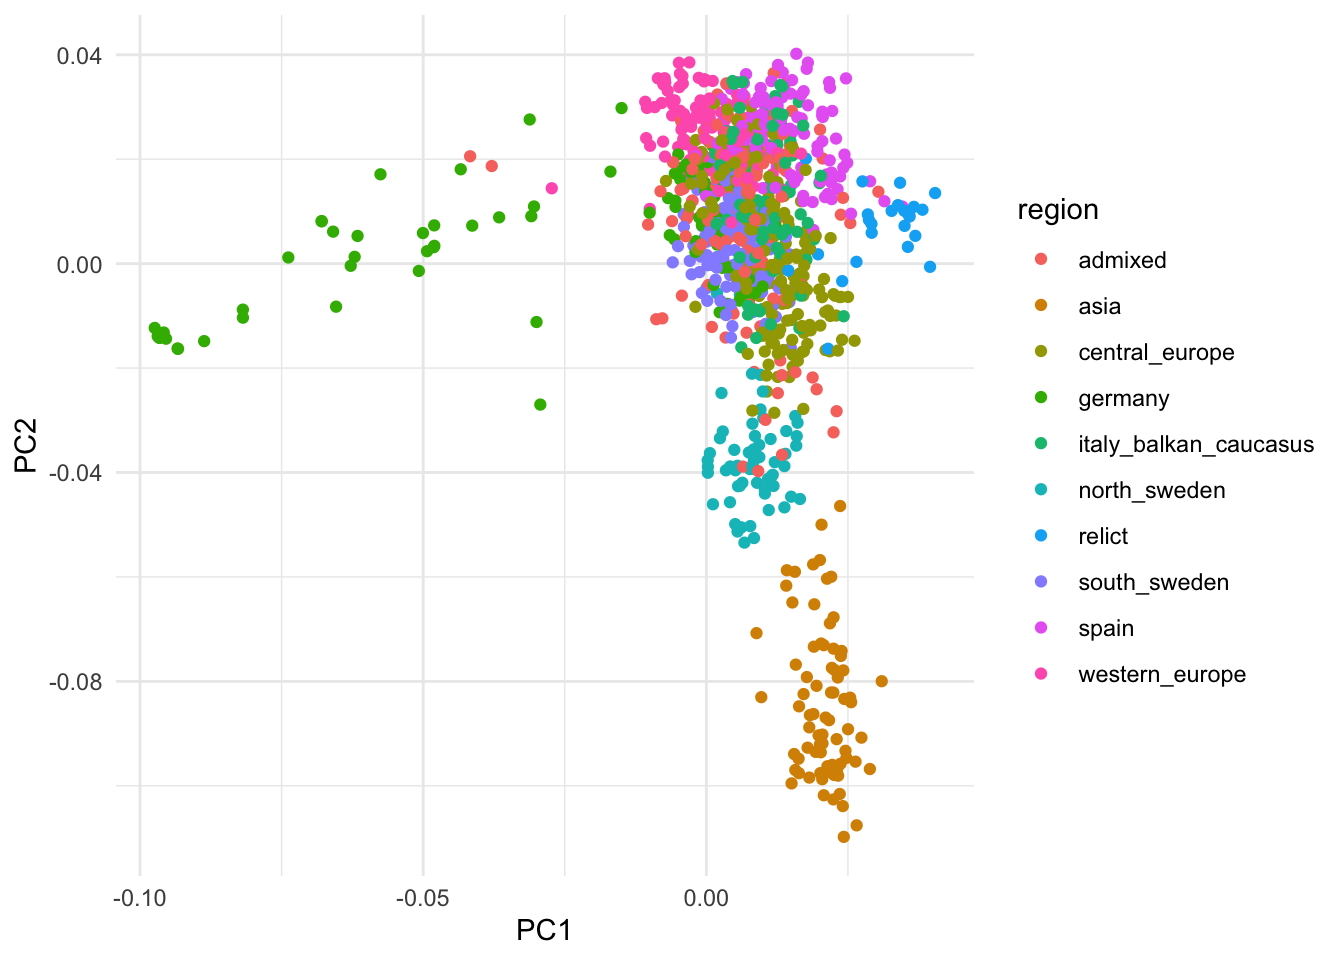
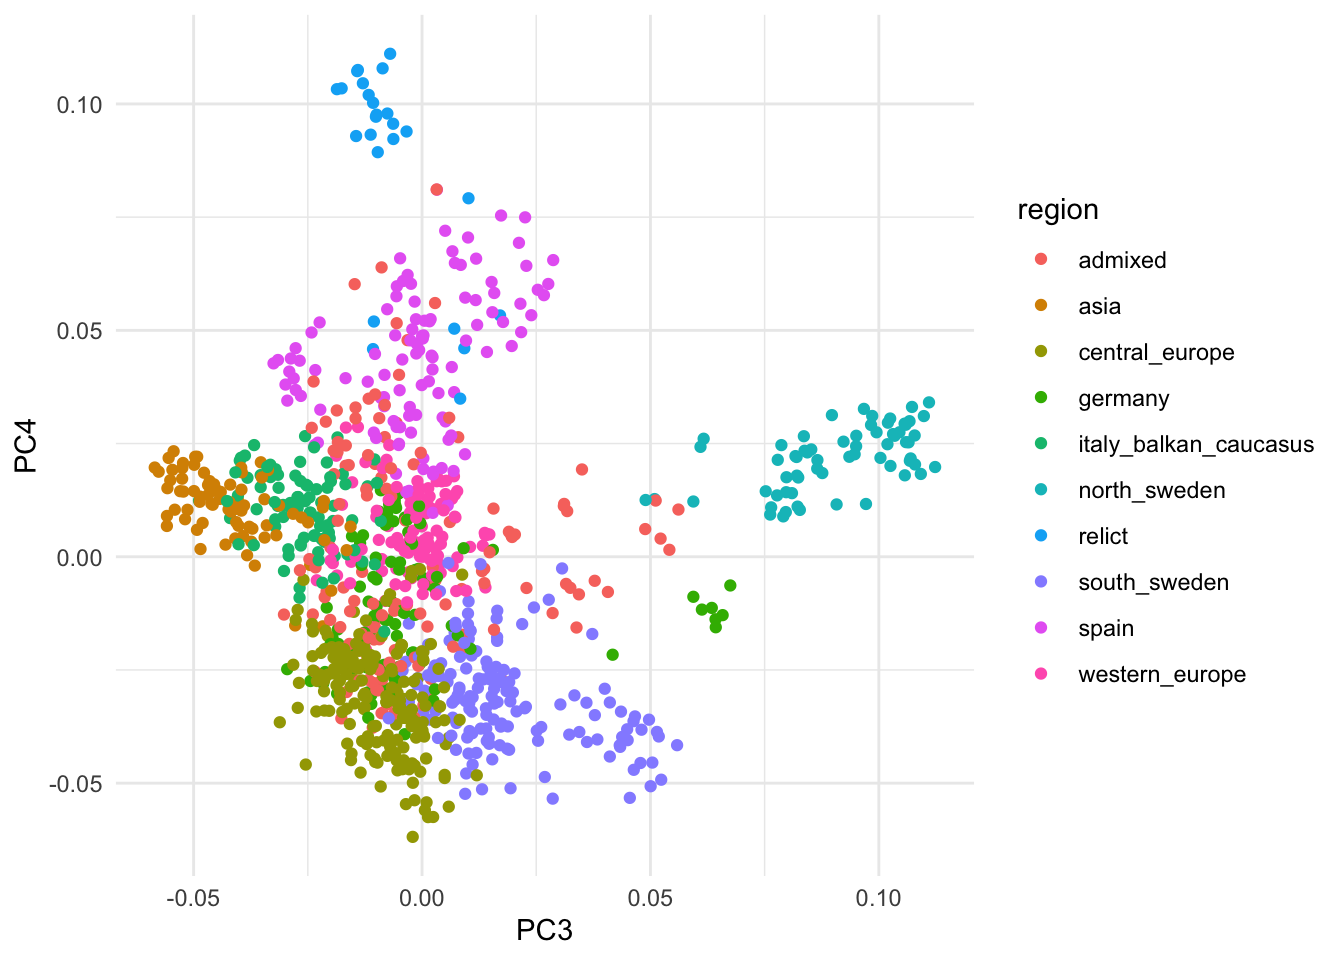

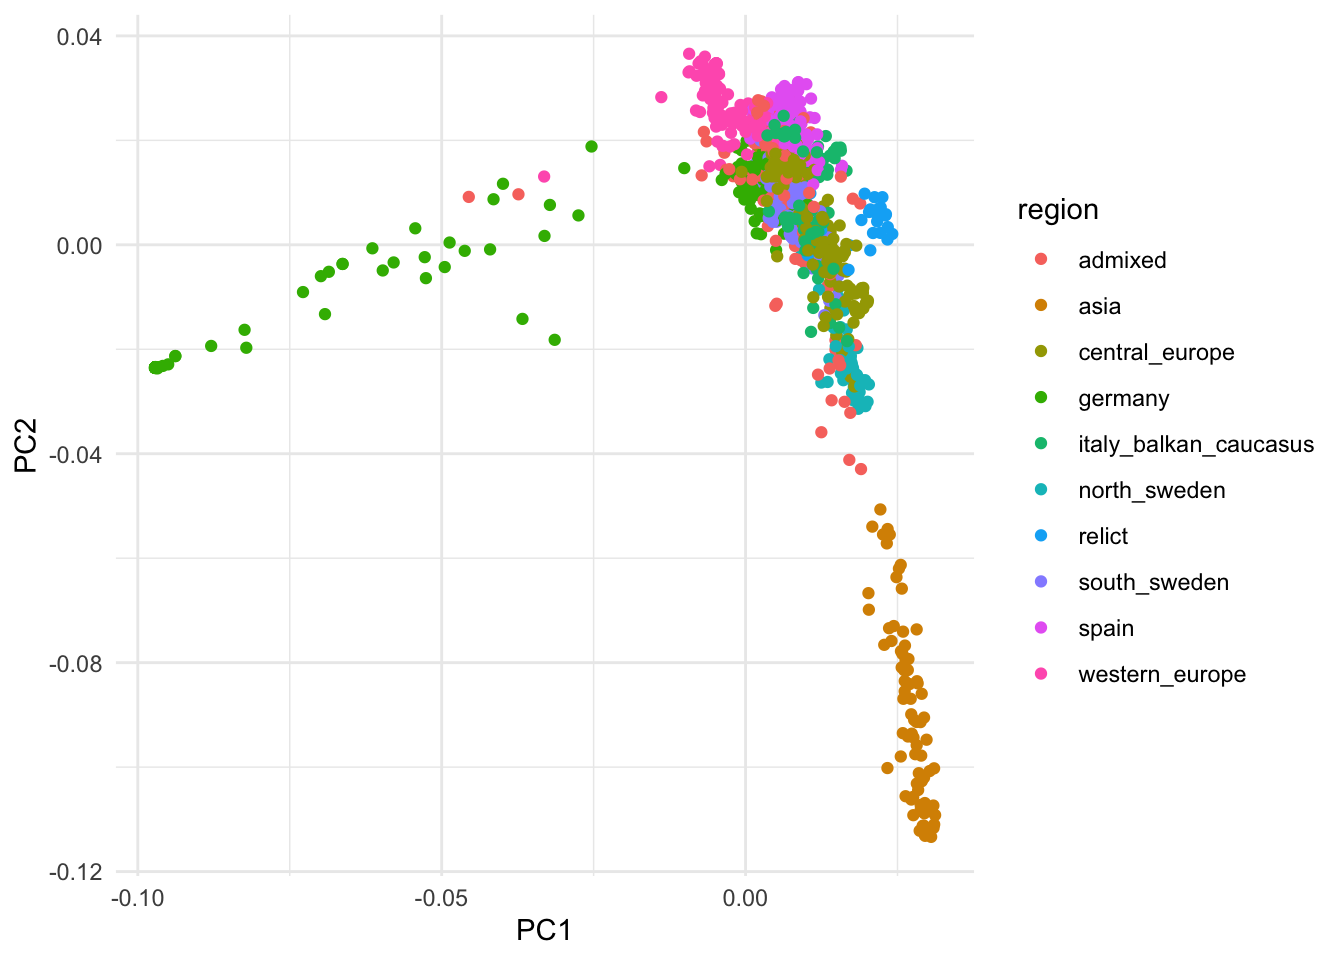
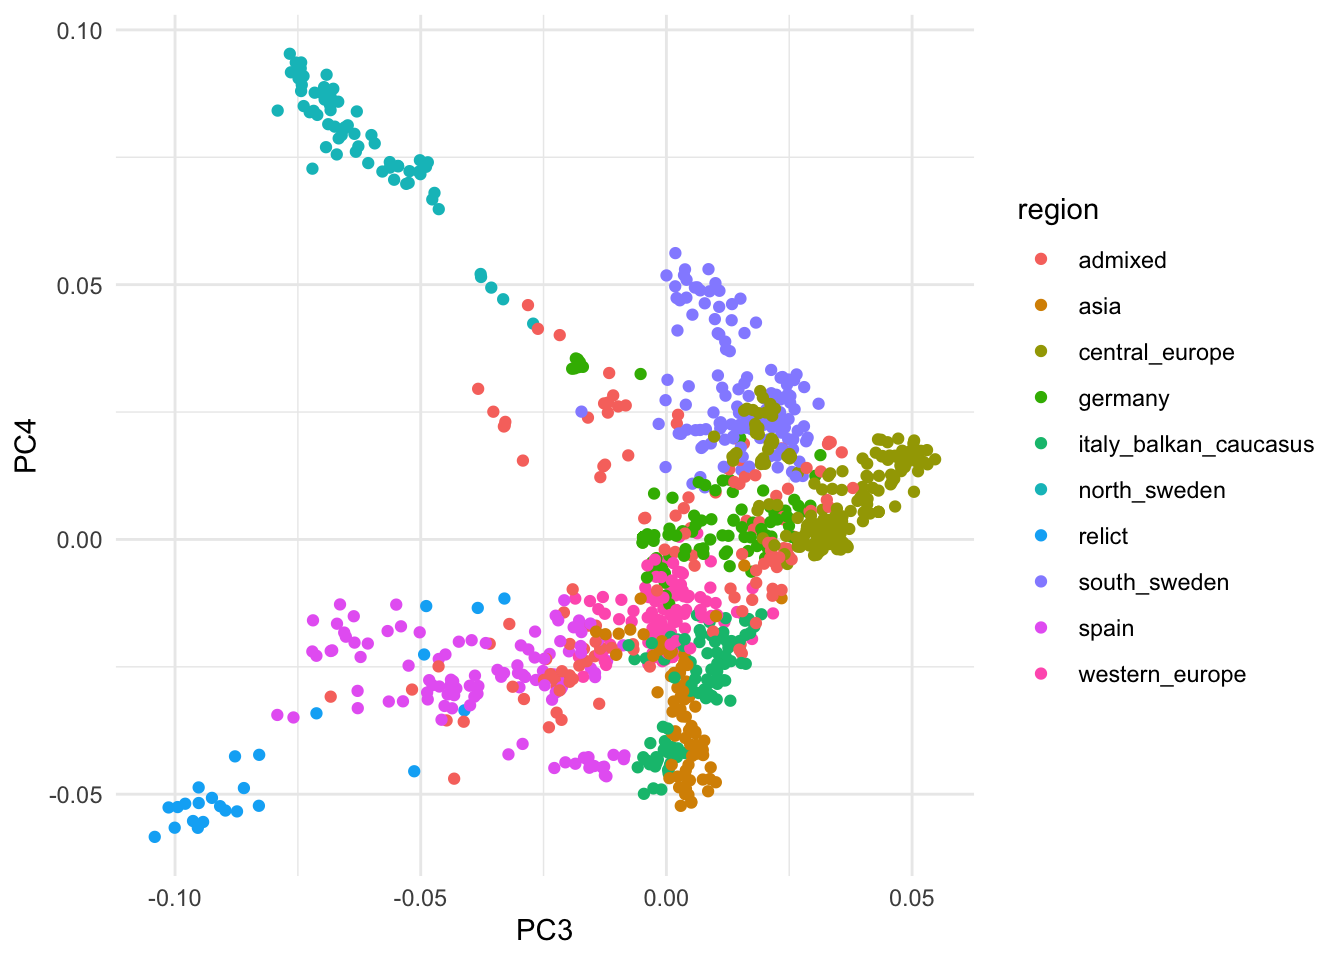

## Questions

1. Based on the plot you've made, what are the major axes of variation in your diversity dataset? How do you know this?
   
3. How many sites were in the dataset of all SNPs that you used to calculate the PCA without subsampling? How did you find this out?

4. How did changing the number of SNPs affect the PCA plots you made? How many SNPs would you recommend that another researcher use for Arabidopsis PCA?

# Answers
1. German vs. not German seems to be the most defining characteristic, since that's what separates left from right in the plot with all the SNPs. It's kind of hard to tell with the default colors, but it looks like Asian/not Asian seems to separate top from bottom (PC2) in the plot with all the SNPs, but the northern Sweden samples are also clustering with the Asian samples.
2. There are 456,429 lines in the filtered but not subsampled .bim file, so I assume that is how many SNPs were in the original set.
3. Increasing the number of led to more dots being closer together, and defined the clusters with more certainty. I say certainty because similar colors are closer together the more SNPs I include in the plot. I would say 10,000 SNPs is sufficient to see clustering, but you don't capture similarities between Europe and Asia at that level. To save computational time and resources, I would say 10,000 SNPs is enough to do the PCA, but if possible it should be done using the whole set.

## Other helpful stuff:

[The Documentation for Plink2](https://www.cog-genomics.org/plink/2.0/)

[A tutorial on PCA using Plink](https://www.zoology.ubc.ca/~schluter/R/Genomics.html#PCA_with_PLINK2)